K-Vecinos Cercanos

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing


In [3]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df['custcat'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa55bacfb38>,
      dtype=object)

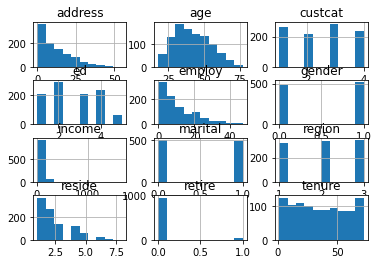

In [5]:
df.hist()

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [12]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

Normalizar datos

In [13]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

Clasificacion KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
#Mientras tanto k = 4
modelo = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [17]:
y_gorro = modelo.predict(X_test)
y_gorro[0:5]

array([1, 1, 3, 2, 4])

Evaluacion

In [19]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_gorro))

Accuracy:  0.32


Algoritmo iterativo para elegir K

In [38]:
ks = 20
mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks - 1))

for i in range(1, ks):
    modelo = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_gorro = modelo.predict(X_test)
    mean_acc[i - 1] = metrics.accuracy_score(y_test, y_gorro)
    #print(mean_acc[i-1])
    
    std_acc[i - 1] = np.std(y_gorro == y_test)/np.sqrt(y_gorro.shape[0])
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipyk

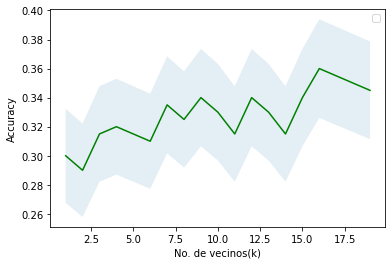

In [41]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1, ks), mean_acc - 1*std_acc, mean_acc + 1*std_acc, alpha = 0.12)
plt.legend('Accuracy', '+/- 3xstd')
plt.xlabel("No. de vecinos(k)")
plt.ylabel("Accuracy")
plt.show()